In [1]:
#import important packages
from __future__ import print_function, division
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
import nsfg
import first
import thinkstats2
import thinkplot
import random
import csv

In [2]:
rm_quote = lambda x: x.replace('"', '')
NY = pd.read_csv ('Covid_Data_NY.csv',delimiter=',',  
     converters={'\"j\"': rm_quote, 
                 '\"x\"': rm_quote})
NY.head()

,Date,Fixed_Date,String_Date,Year,Month,Day,Full_Date,Month.1,Month_Date_Format,New Tests,Cases,Negative,Hospitalized,Deaths,Total
0,Tue Jul 28 2020,Jul 28 2020,Jul 28 2020,2020,7,28,7/28/20,202007,7/1/20,57397,412878,5271668,89995.0,25126.0,5684546
1,Mon Jul 27 2020,Jul 27 2020,Jul 27 2020,2020,7,27,7/27/20,202007,7/1/20,57270,412344,5214805,89995.0,25117.0,5627149
2,Sun Jul 26 2020,Jul 26 2020,Jul 26 2020,2020,7,26,7/26/20,202007,7/1/20,53568,411736,5158143,89995.0,25106.0,5569879
3,Sat Jul 25 2020,Jul 25 2020,Jul 25 2020,2020,7,25,7/25/20,202007,7/1/20,71466,411200,5105111,89995.0,25103.0,5516311
4,Fri Jul 24 2020,Jul 24 2020,Jul 24 2020,2020,7,24,7/24/20,202007,7/1/20,76507,410450,5034395,89995.0,25090.0,5444845


In [3]:
NY = NY.rename(columns={'Month.1': 'MNTH'})

In [4]:
NY.head()

,Date,Fixed_Date,String_Date,Year,Month,Day,Full_Date,MNTH,Month_Date_Format,New Tests,Cases,Negative,Hospitalized,Deaths,Total
0,Tue Jul 28 2020,Jul 28 2020,Jul 28 2020,2020,7,28,7/28/20,202007,7/1/20,57397,412878,5271668,89995.0,25126.0,5684546
1,Mon Jul 27 2020,Jul 27 2020,Jul 27 2020,2020,7,27,7/27/20,202007,7/1/20,57270,412344,5214805,89995.0,25117.0,5627149
2,Sun Jul 26 2020,Jul 26 2020,Jul 26 2020,2020,7,26,7/26/20,202007,7/1/20,53568,411736,5158143,89995.0,25106.0,5569879
3,Sat Jul 25 2020,Jul 25 2020,Jul 25 2020,2020,7,25,7/25/20,202007,7/1/20,71466,411200,5105111,89995.0,25103.0,5516311
4,Fri Jul 24 2020,Jul 24 2020,Jul 24 2020,2020,7,24,7/24/20,202007,7/1/20,76507,410450,5034395,89995.0,25090.0,5444845


In [5]:
NY.dtypes

Date                  object
Fixed_Date            object
String_Date           object
Year                   int64
Month                  int64
Day                    int64
Full_Date             object
MNTH                   int64
Month_Date_Format     object
New Tests              int64
Cases                  int64
Negative               int64
Hospitalized         float64
Deaths               float64
Total                  int64
dtype: object

In [6]:
NY['Full_Date'] = pd.to_datetime(NY['Full_Date'])
NY['Month_Date_Format'] = pd.to_datetime(NY['Month_Date_Format'])

In [7]:
NY.head()

,Date,Fixed_Date,String_Date,Year,Month,Day,Full_Date,MNTH,Month_Date_Format,New Tests,Cases,Negative,Hospitalized,Deaths,Total
0,Tue Jul 28 2020,Jul 28 2020,Jul 28 2020,2020,7,28,2020-07-28,202007,2020-07-01,57397,412878,5271668,89995.0,25126.0,5684546
1,Mon Jul 27 2020,Jul 27 2020,Jul 27 2020,2020,7,27,2020-07-27,202007,2020-07-01,57270,412344,5214805,89995.0,25117.0,5627149
2,Sun Jul 26 2020,Jul 26 2020,Jul 26 2020,2020,7,26,2020-07-26,202007,2020-07-01,53568,411736,5158143,89995.0,25106.0,5569879
3,Sat Jul 25 2020,Jul 25 2020,Jul 25 2020,2020,7,25,2020-07-25,202007,2020-07-01,71466,411200,5105111,89995.0,25103.0,5516311
4,Fri Jul 24 2020,Jul 24 2020,Jul 24 2020,2020,7,24,2020-07-24,202007,2020-07-01,76507,410450,5034395,89995.0,25090.0,5444845


In [8]:
IL = pd.read_csv ('Covid_Data_IL.csv')
IL = IL.rename(columns={'Full Date': 'Full_Date'})
IL['Full_Date'] = pd.to_datetime(IL['Full_Date'])
IL.head()

,Full_Date,Month,Cases,Negative,Hospitalized,Deaths,Total
0,2020-07-28,7,175124.0,2433528,1491.0,7462.0,2609894
1,2020-07-27,7,173731.0,2396734,1383.0,7446.0,2571707
2,2020-07-26,7,172655.0,2369479,1417.0,7416.0,2543376
3,2020-07-25,7,171424.0,2340143,1394.0,7398.0,2512809
4,2020-07-24,7,169883.0,2300840,1438.0,7397.0,2471965


In [9]:
IL.dtypes

Full_Date       datetime64[ns]
Month                    int64
Cases                  float64
Negative                 int64
Hospitalized           float64
Deaths                 float64
Total                    int64
dtype: object

In [10]:
for col in IL:
    print(col)

Full_Date
Month
Cases
Negative
Hospitalized
Deaths
Total


In [11]:
AZ = pd.read_csv ('Covid_Data_Arizona.csv')
AZ.head()

,Original_Date,Fixed_Date,String Date,Year,Month,Day,Full_Date,Month.1,Month_Date_Format,New Tests,Cases,Negative,Hospitalized,Deaths,Total
0,Tue Jul 28 2020,Jul 28 2020,Jul 28 2020,2020,7,28,7/28/20,202007,7/1/20,12598,165934,724997,9394,3408.0,890931
1,Mon Jul 27 2020,Jul 27 2020,Jul 27 2020,2020,7,27,7/27/20,202007,7/1/20,11230,163827,714506,7751,3304.0,878333
2,Sun Jul 26 2020,Jul 26 2020,Jul 26 2020,2020,7,26,7/26/20,202007,7/1/20,9494,162014,705089,7706,3305.0,867103
3,Sat Jul 25 2020,Jul 25 2020,Jul 25 2020,2020,7,25,7/25/20,202007,7/1/20,20792,160041,697568,7627,3286.0,857609
4,Fri Jul 24 2020,Jul 24 2020,Jul 24 2020,2020,7,24,7/24/20,202007,7/1/20,14104,156301,680516,7461,3142.0,836817


In [12]:
AZ = AZ.rename(columns={'Month.1': 'MNTH'})

In [13]:
AZ.head()

,Original_Date,Fixed_Date,String Date,Year,Month,Day,Full_Date,MNTH,Month_Date_Format,New Tests,Cases,Negative,Hospitalized,Deaths,Total
0,Tue Jul 28 2020,Jul 28 2020,Jul 28 2020,2020,7,28,7/28/20,202007,7/1/20,12598,165934,724997,9394,3408.0,890931
1,Mon Jul 27 2020,Jul 27 2020,Jul 27 2020,2020,7,27,7/27/20,202007,7/1/20,11230,163827,714506,7751,3304.0,878333
2,Sun Jul 26 2020,Jul 26 2020,Jul 26 2020,2020,7,26,7/26/20,202007,7/1/20,9494,162014,705089,7706,3305.0,867103
3,Sat Jul 25 2020,Jul 25 2020,Jul 25 2020,2020,7,25,7/25/20,202007,7/1/20,20792,160041,697568,7627,3286.0,857609
4,Fri Jul 24 2020,Jul 24 2020,Jul 24 2020,2020,7,24,7/24/20,202007,7/1/20,14104,156301,680516,7461,3142.0,836817


In [14]:
AZ.dtypes

Original_Date         object
Fixed_Date            object
String Date           object
Year                   int64
Month                  int64
Day                    int64
Full_Date             object
MNTH                   int64
Month_Date_Format     object
New Tests              int64
Cases                  int64
Negative               int64
Hospitalized           int64
Deaths               float64
Total                  int64
dtype: object

In [15]:
AZ['Full_Date'] = pd.to_datetime(AZ['Full_Date'])
AZ['Month_Date_Format'] = pd.to_datetime(AZ['Month_Date_Format'])

In [16]:
AZ.head()

,Original_Date,Fixed_Date,String Date,Year,Month,Day,Full_Date,MNTH,Month_Date_Format,New Tests,Cases,Negative,Hospitalized,Deaths,Total
0,Tue Jul 28 2020,Jul 28 2020,Jul 28 2020,2020,7,28,2020-07-28,202007,2020-07-01,12598,165934,724997,9394,3408.0,890931
1,Mon Jul 27 2020,Jul 27 2020,Jul 27 2020,2020,7,27,2020-07-27,202007,2020-07-01,11230,163827,714506,7751,3304.0,878333
2,Sun Jul 26 2020,Jul 26 2020,Jul 26 2020,2020,7,26,2020-07-26,202007,2020-07-01,9494,162014,705089,7706,3305.0,867103
3,Sat Jul 25 2020,Jul 25 2020,Jul 25 2020,2020,7,25,2020-07-25,202007,2020-07-01,20792,160041,697568,7627,3286.0,857609
4,Fri Jul 24 2020,Jul 24 2020,Jul 24 2020,2020,7,24,2020-07-24,202007,2020-07-01,14104,156301,680516,7461,3142.0,836817


In [17]:
for col in AZ:
    print(col)

Original_Date
Fixed_Date
String Date
Year
Month
Day
Full_Date
MNTH
Month_Date_Format
New Tests
Cases
Negative
Hospitalized
Deaths
Total


In [18]:
for col in NY:
    print (col)

Date
Fixed_Date
String_Date
Year
Month
Day
Full_Date
MNTH
Month_Date_Format
New Tests
Cases
Negative
Hospitalized
Deaths
Total


<function matplotlib.pyplot.show(*args, **kw)>

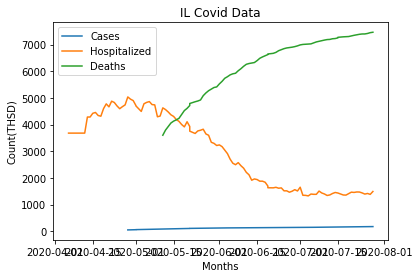

In [19]:
plt.plot(IL.Full_Date, IL.Cases/1000)
plt.plot(IL.Full_Date,IL.Hospitalized)
plt.plot(IL.Full_Date,IL.Deaths)
plt.title("IL Covid Data")
plt.legend(["Cases", "Hospitalized", "Deaths"])
plt.xlabel("Months")
plt.ylabel("Count(THSD)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

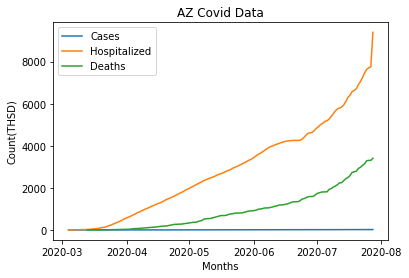

In [20]:
plt.plot(AZ.Full_Date, AZ.Cases/10000)
plt.plot(AZ.Full_Date,AZ.Hospitalized)
plt.plot(AZ.Full_Date,AZ.Deaths)
plt.title("AZ Covid Data")
plt.legend(["Cases", "Hospitalized", "Deaths"])
plt.xlabel("Months")
plt.ylabel("Count(THSD)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

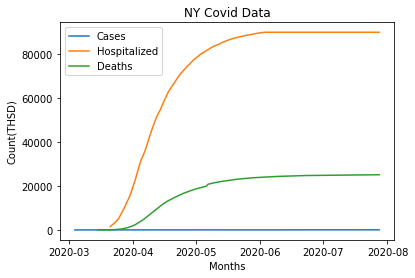

In [21]:
plt.plot(NY.Full_Date, NY.Cases/10000)
plt.plot(NY.Full_Date,NY.Hospitalized)
plt.plot(NY.Full_Date,NY.Deaths)
plt.title("NY Covid Data")
plt.legend(["Cases", "Hospitalized", "Deaths"])
plt.xlabel("Months")
plt.ylabel("Count(THSD)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

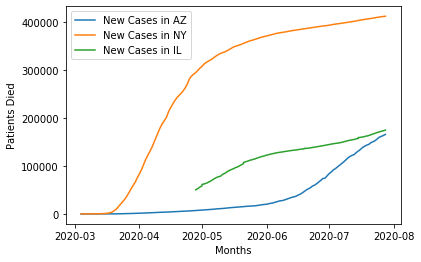

In [22]:
plt.plot(AZ.Full_Date, AZ.Cases)
plt.plot(NY.Full_Date,NY.Cases)
plt.plot(IL.Full_Date,IL.Cases)
plt.legend(["New Cases in AZ", "New Cases in NY", "New Cases in IL"])
plt.xlabel("Months")
plt.ylabel("Patients Died")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

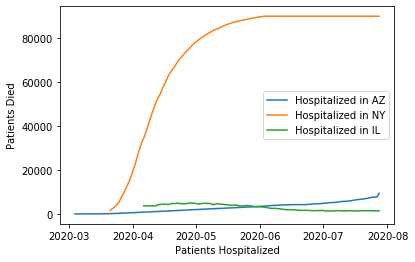

In [23]:
plt.plot(AZ.Full_Date, AZ.Hospitalized)
plt.plot(NY.Full_Date,NY.Hospitalized)
plt.plot(IL.Full_Date,IL.Hospitalized)

plt.legend(["Hospitalized in AZ", "Hospitalized in NY","Hospitalized in IL"])
plt.xlabel("Patients Hospitalized")
plt.ylabel("Patients Died")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

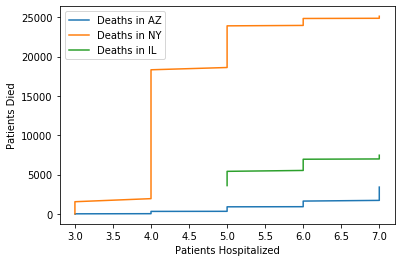

In [24]:
plt.plot(AZ.Month, AZ.Deaths)
plt.plot(NY.Month,NY.Deaths)
plt.plot(IL.Month,IL.Deaths)

plt.legend(["Deaths in AZ", "Deaths in NY","Deaths in IL"])
plt.xlabel("Patients Hospitalized")
plt.ylabel("Patients Died")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

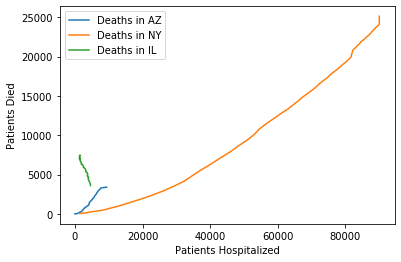

In [25]:
plt.plot(AZ.Hospitalized, AZ.Deaths)
plt.plot(NY.Hospitalized,NY.Deaths)
plt.plot(IL.Hospitalized,IL.Deaths)

plt.legend(["Deaths in AZ", "Deaths in NY", "Deaths in IL"])
plt.xlabel("Patients Hospitalized")
plt.ylabel("Patients Died")

plt.show

In [26]:
IL_Avg_Death = IL["Deaths"].mean()
AZ_Avg_Death = AZ["Deaths"].mean()
NY_Avg_Death = NY["Deaths"].mean()

IL_Avg_Hospitalized = IL["Hospitalized"].mean()
AZ_Avg_Hospitalized = AZ["Hospitalized"].mean()
NY_Avg_Hospitalized = NY["Hospitalized"].mean() 

IL_Avg_Death/IL_Avg_Hospitalized, AZ_Avg_Death/AZ_Avg_Hospitalized, NY_Avg_Death/NY_Avg_Hospitalized


(2.084234946154866, 0.329597270586949, 0.24477147766416849)

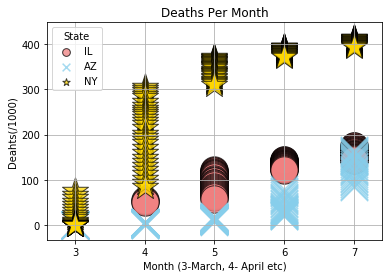

In [27]:
plt.scatter(IL.Month, IL.Cases/10**3, marker="o", facecolors="lightcoral", edgecolors="black",
         s= 750, alpha=.75, label="IL")
plt.scatter(AZ.Month, AZ.Cases/10**3, marker="x", facecolors="skyblue", edgecolors="black",
           s= 750, alpha=0.75, label="AZ")
plt.scatter(NY.Month, NY.Cases/10**3, marker="*", facecolors="gold", edgecolors="black",
           s= 750, alpha=0.75, label="NY")

plt.title("Deaths Per Month")
plt.ylabel("Deahts(/1000)")
plt.xlabel("Month (3-March, 4- April etc)")
plt.grid()

legend = plt.legend(loc="upper left", title= "State")
legend.legendHandles[0]._sizes = [60]
legend.legendHandles[1]._sizes = [60]
legend.legendHandles[2]._sizes = [60]

plt.savefig("Pyber Bubble Graph.png",bbox_inches = "tight")
plt.show()


In [28]:
IL_df = pd.DataFrame(IL,columns = ['Cases'])
AZ_df = pd.DataFrame(AZ,columns = ['Cases'])
NY_df = pd.DataFrame(NY,columns = ['Cases'])

IL_df, AZ_df, NY_df 

(        Cases
 0    175124.0
 1    173731.0
 2    172655.0
 3    171424.0
 4    169883.0
 ..        ...
 135       NaN
 136       NaN
 137       NaN
 138       NaN
 139       NaN
 
 [140 rows x 1 columns],
       Cases
 0    165934
 1    163827
 2    162014
 3    160041
 4    156301
 ..      ...
 142       5
 143       5
 144       3
 145       2
 146       2
 
 [147 rows x 1 columns],
       Cases
 0    412878
 1    412344
 2    411736
 3    411200
 4    410450
 ..      ...
 142     105
 143      76
 144      33
 145      22
 146       6
 
 [147 rows x 1 columns])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f0bae50>]],
      dtype=object)

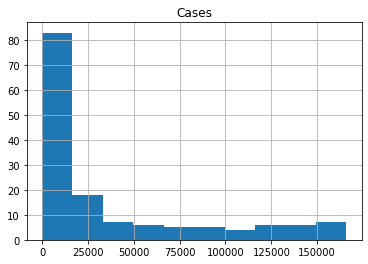

In [29]:
AZ_df.hist(column='Cases')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f347550>]],
      dtype=object)

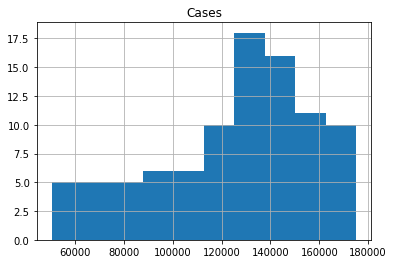

In [30]:
IL_df.hist(column='Cases')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f442190>]],
      dtype=object)

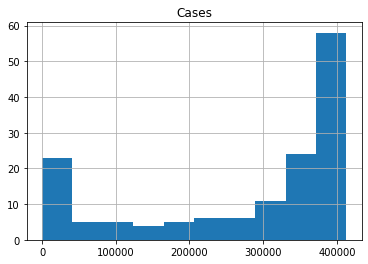

In [31]:
NY_df.hist(column='Cases')

In [32]:
IL_df.mean(),AZ_df.mean(),NY_df.mean()

(Cases    124924.423913
 dtype: float64,
 Cases    36973.578231
 dtype: float64,
 Cases    273434.163265
 dtype: float64)

In [33]:
IL_df.min(),IL_df.max()

(Cases    50355.0
 dtype: float64,
 Cases    175124.0
 dtype: float64)

In [34]:
AZ_df.min(),AZ_df.max()

(Cases    2
 dtype: int64,
 Cases    165934
 dtype: int64)

In [35]:
NY_df.min(),NY_df.max()

(Cases    6
 dtype: int64,
 Cases    412878
 dtype: int64)

<function matplotlib.pyplot.show(*args, **kw)>

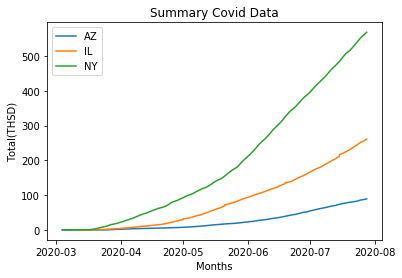

In [37]:
plt.plot(AZ.Full_Date, AZ.Total/10000)
plt.plot(IL.Full_Date,IL.Total/10000)
plt.plot(NY.Full_Date,NY.Total/10000)
plt.title("Summary Covid Data")
plt.legend(["AZ", "IL", "NY"])
plt.xlabel("Months")
plt.ylabel("Total(THSD)")
plt.show